# Initiialization

## Packages Loading

In [106]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Data Loading

In [107]:
Dataset_File = "ToyotaUsedCars.csv"
if not os.path.isfile(Dataset_File):
  os.system("wget https://raw.githubusercontent.com/cnchi/datasets/master/"+Dataset_File)

In [108]:
data = pd.read_csv(Dataset_File)

# EDA

In [109]:
data.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,GT86,2016,Manual,24089,Petrol,265,36.2,2.0,16000
1,GT86,2017,Manual,18615,Petrol,145,36.2,2.0,15995
2,GT86,2015,Manual,27469,Petrol,265,36.2,2.0,13998
3,GT86,2017,Manual,14736,Petrol,150,36.2,2.0,18998
4,GT86,2017,Manual,36284,Petrol,145,36.2,2.0,17498


In [110]:
# move categorical data to the head of the dataframe
col_to_move = ["model", "transmission", "fuelType"]
reset_of_cols = [col for col in data if col not in col_to_move]
data = data[col_to_move + reset_of_cols]

In [111]:
data.head()

,model,transmission,fuelType,year,mileage,tax,mpg,engineSize,price
0,GT86,Manual,Petrol,2016,24089,265,36.2,2.0,16000
1,GT86,Manual,Petrol,2017,18615,145,36.2,2.0,15995
2,GT86,Manual,Petrol,2015,27469,265,36.2,2.0,13998
3,GT86,Manual,Petrol,2017,14736,150,36.2,2.0,18998
4,GT86,Manual,Petrol,2017,36284,145,36.2,2.0,17498


In [112]:
data.describe(include="all")

,model,transmission,fuelType,year,mileage,tax,mpg,engineSize,price
count,6738,6738,6738,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
unique,18,4,4,NaN,NaN,NaN,NaN,NaN,NaN
top,Yaris,Manual,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,2122,3826,4087,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2016.748145,22857.413921,94.697240,63.042223,1.471297,12522.391066
std,NaN,NaN,NaN,2.204062,19125.464147,73.880776,15.836710,0.436159,6345.017587
min,NaN,NaN,NaN,1998.000000,2.000000,0.000000,2.800000,0.000000,850.000000
25%,NaN,NaN,NaN,2016.000000,9446.000000,0.000000,55.400000,1.000000,8290.000000
50%,NaN,NaN,NaN,2017.000000,18513.000000,135.000000,62.800000,1.500000,10795.000000
75%,NaN,NaN,NaN,2018.000000,31063.750000,145.000000,69.000000,1.800000,14995.000000


In [113]:
data.isnull().sum()

model           0
transmission    0
fuelType        0
year            0
mileage         0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

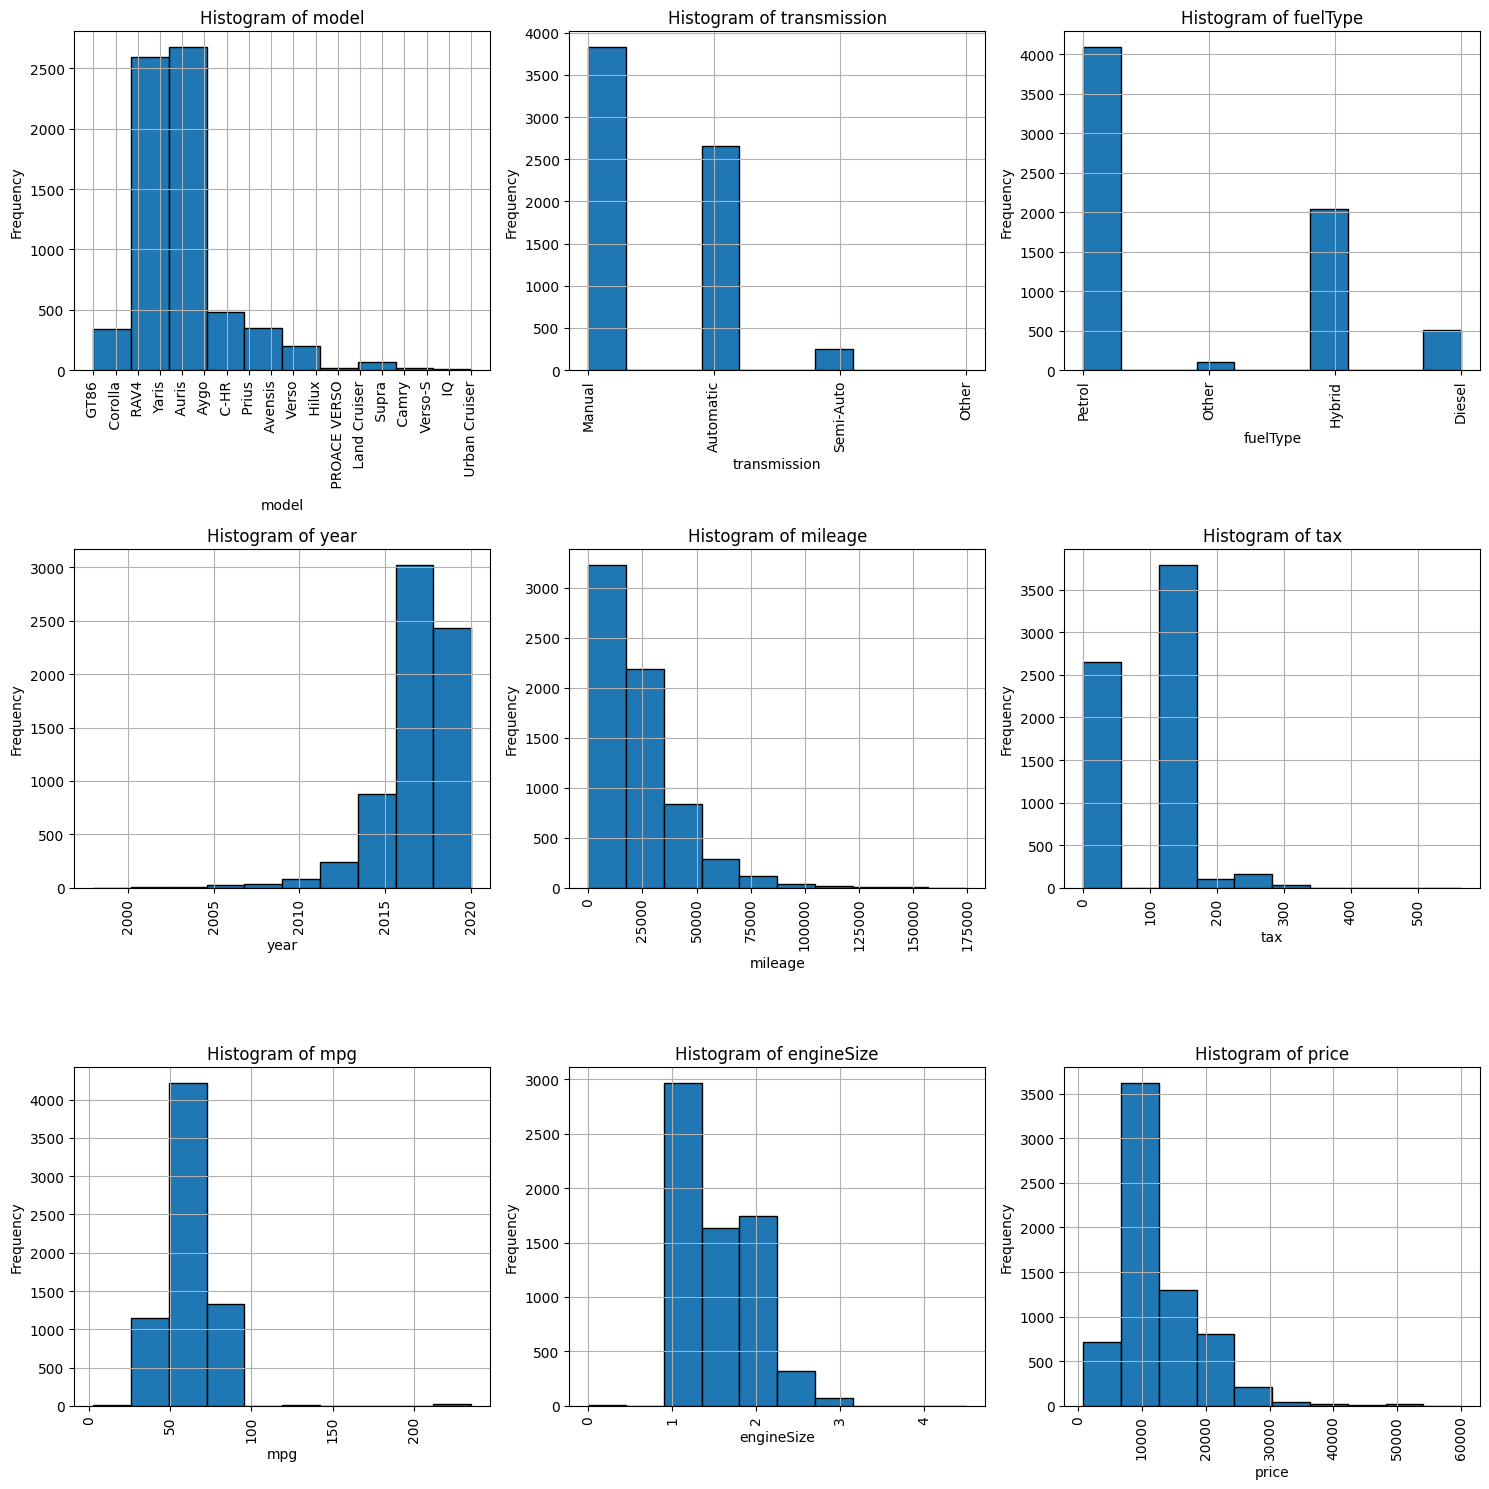

In [114]:
# frequency
nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

for i, column in enumerate(data.columns):
    row = i // ncols  # Calculate the row index
    col = i % nrows   # Calculate the column index

    ax = axes[row, col]  # Get the subplot for this column

    ax.hist(data[column], bins=10, edgecolor='black', align='mid')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

    for label in ax.get_xticklabels():
      label.set_rotation(90)

    ax.grid()

# Adjust subplot spacing for a better layout
plt.tight_layout()

# Display the figure
plt.show()

# Preprocessing

## Splitting Dependent and Independent Variable

In [115]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [116]:
X, y

(array([[' GT86', 'Manual', 'Petrol', ..., 265, 36.2, 2.0],
        [' GT86', 'Manual', 'Petrol', ..., 145, 36.2, 2.0],
        [' GT86', 'Manual', 'Petrol', ..., 265, 36.2, 2.0],
        ...,
        [' Urban Cruiser', 'Manual', 'Diesel', ..., 125, 57.6, 1.4],
        [' Urban Cruiser', 'Manual', 'Petrol', ..., 125, 50.4, 1.3],
        [' Urban Cruiser', 'Manual', 'Petrol', ..., 125, 50.4, 1.3]],
       dtype=object),
 array([16000, 15995, 13998, ...,  4995,  3995,  4495]))

## Handling Missing Value

In [117]:
# no missing value

## Categorical Data to Digital

In [118]:
# model, transmission, fuelTyp
cat_dummies = pd.get_dummies(data, columns=["model", "transmission", "fuelType"]).values

In [119]:
cat_dummies

array([[2.0160e+03, 2.4089e+04, 2.6500e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0170e+03, 1.8615e+04, 1.4500e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0150e+03, 2.7469e+04, 2.6500e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [2.0120e+03, 4.6000e+04, 1.2500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0110e+03, 6.0700e+04, 1.2500e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0110e+03, 4.5128e+04, 1.2500e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [120]:
X = np.concatenate((cat_dummies, X[:, 4:]), axis=1).astype("float64")

In [121]:
X[0]

array([2.0160e+03, 2.4089e+04, 2.6500e+02, 3.6200e+01, 2.0000e+00,
       1.6000e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 2.4089e+04, 2.6500e+02, 3.6200e+01,
       2.0000e+00])

## Splitting Training and Testing Dataset

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [123]:
X_train.shape, X_test.shape

((5390, 36), (1348, 36))

## Feature Scaling

In [124]:
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [125]:
X_train[0]

array([-0.81548946, -0.19993468, -1.28400007,  0.37953844, -1.08498088,
       -0.88146817, -0.34151953, -0.13177649,  1.56617841, -0.2792848 ,
       -0.04089684, -0.20579499, -0.09869892, -0.11553516, -0.03606092,
       -0.08313851, -0.05103104, -0.19062834, -0.27773781, -0.04522156,
       -0.02359865, -0.13322629, -0.01926643, -0.67583782, -0.81240005,
        0.87756193, -0.01362216, -0.19681409, -0.28388981, -0.66595213,
       -0.12196224,  0.81051346, -0.19993468, -1.28400007,  0.37953844,
       -1.08498088])

# NN

## Building a NN

In [126]:
def compute_hidden_neurons(N_s, N_i, N_o, alpha):
    return N_s // (alpha * (N_i + N_o))

In [127]:
def build_nn():
  model = Sequential()

  N_s = X_train.shape[0]
  N_i = X_train.shape[1]
  N_o = 1

  init_h1 = compute_hidden_neurons(N_s, N_i, 1, 5)

  # I & H1
  model.add(Dense(
      input_dim=N_i,
      units=init_h1,
      kernel_initializer="glorot_normal",
      activation="relu")
  )

  # H2
  model.add(Dense(
      units=compute_hidden_neurons(N_s, init_h1, N_o, 5),
      kernel_initializer="glorot_normal",
      activation="relu")
  )

  # O
  model.add(Dense(
      units=N_o,
      kernel_initializer="glorot_normal",
      activation="linear"
  ))

  return model

In [128]:
model = build_nn()

In [129]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 29)                1073      
                                                                 
 dense_16 (Dense)            (None, 35)                1050      
                                                                 
 dense_17 (Dense)            (None, 1)                 36        
                                                                 
Total params: 2159 (8.43 KB)
Trainable params: 2159 (8.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [130]:
print(model.inputs)

[<KerasTensor: shape=(None, 36) dtype=float32 (created by layer 'dense_15_input')>]


In [131]:
print(model.outputs)

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_17')>]


## Compile the NN

In [132]:
from keras import backend as K

# R square metrics
# a good model will get bigger R square
# epsilon to avoid 0 in the denominator
def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [133]:
model.compile(optimizer="adam", loss="mse", metrics=["mse", r_squared])

## Model Training and Calibration

### Training

In [134]:
epochs_metrics = model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=5, epochs=50)

Epoch 1/50
863/863 [==============================] - 9s 3ms/step - loss: 162006944.0000 - mse: 162006944.0000 - r_squared: -12.7401 - val_loss: 88417392.0000 - val_mse: 88417392.0000 - val_r_squared: -5.5603
Epoch 2/50
863/863 [==============================] - 3s 3ms/step - loss: 36461808.0000 - mse: 36461808.0000 - r_squared: -10.4210 - val_loss: 16160335.0000 - val_mse: 16160335.0000 - val_r_squared: -0.1968
Epoch 3/50
863/863 [==============================] - 2s 3ms/step - loss: 8601392.0000 - mse: 8601393.0000 - r_squared: 0.3034 - val_loss: 7296374.5000 - val_mse: 7296374.5000 - val_r_squared: 0.6003
Epoch 4/50
863/863 [==============================] - 2s 2ms/step - loss: 4915748.0000 - mse: 4915748.0000 - r_squared: 0.6809 - val_loss: 5066862.0000 - val_mse: 5066862.0000 - val_r_squared: 0.7283
Epoch 5/50
863/863 [==============================] - 2s 2ms/step - loss: 3577421.2500 - mse: 3577421.2500 - r_squared: 0.7409 - val_loss: 3739868.5000 - val_mse: 3739868.5000 - val_r_

### Calibration

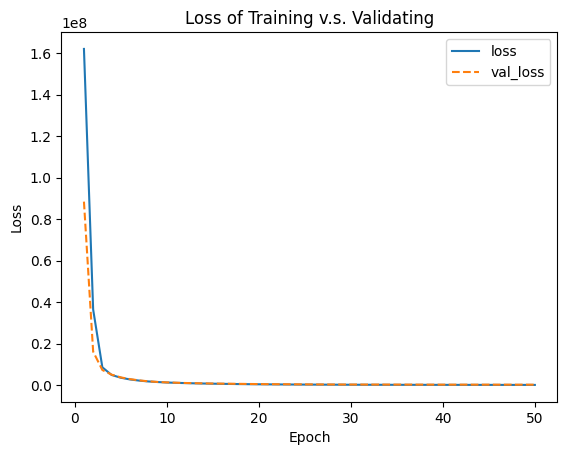

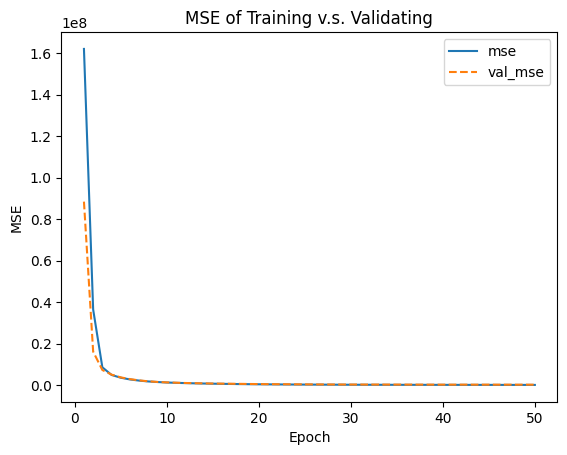

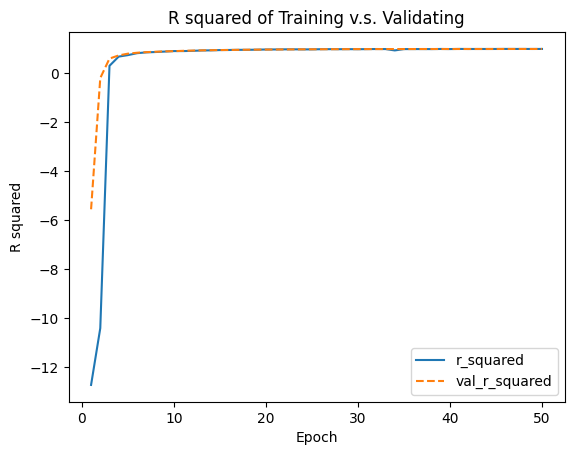

In [135]:
loss = epochs_metrics.history["loss"]
val_loss = epochs_metrics.history["val_loss"]
mse = epochs_metrics.history["mse"]
val_mse = epochs_metrics.history["val_mse"]
met_r_squared = epochs_metrics.history["r_squared"]
val_met_r_squared = epochs_metrics.history["val_r_squared"]
epochs = range(1, len(epochs_metrics.history["loss"])+1)

plt.figure(1)
plt.title("Loss of Training v.s. Validating")
plt.plot(epochs, loss, "-")
plt.plot(epochs, val_loss, "--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["loss", "val_loss"], loc="best")
plt.show()

plt.figure(2)
plt.title("MSE of Training v.s. Validating")
plt.plot(epochs, mse, "-")
plt.plot(epochs, val_mse, "--")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend(["mse", "val_mse"], loc="best")
plt.show()

plt.figure(3)
plt.title("R squared of Training v.s. Validating")
plt.plot(epochs, met_r_squared, "-")
plt.plot(epochs, val_met_r_squared, "--")
plt.xlabel("Epoch")
plt.ylabel("R squared")
plt.legend(["r_squared", "val_r_squared"], loc="best")
plt.show()

In [136]:
"""
From the above graph and metrics history,
we know that we can only use about 35 epochs to achieve our goal
Let's use 35 epochs and train it again
"""

new_model = build_nn()
new_model.compile(optimizer="adam", loss="mse", metrics=["mse", r_squared])
epochs_metrics = new_model.fit(x=X_train, y=y_train, validation_split=0.2, batch_size=5, epochs=35)

Epoch 1/35
863/863 [==============================] - 3s 3ms/step - loss: 158258032.0000 - mse: 158258032.0000 - r_squared: -9.9870 - val_loss: 70396648.0000 - val_mse: 70396648.0000 - val_r_squared: -3.4154
Epoch 2/35
863/863 [==============================] - 3s 3ms/step - loss: 17419180.0000 - mse: 17419180.0000 - r_squared: -0.2581 - val_loss: 7792392.5000 - val_mse: 7792392.5000 - val_r_squared: 0.5660
Epoch 3/35
863/863 [==============================] - 3s 3ms/step - loss: 4934292.5000 - mse: 4934292.5000 - r_squared: 0.6483 - val_loss: 4995058.5000 - val_mse: 4995058.5000 - val_r_squared: 0.7449
Epoch 4/35
863/863 [==============================] - 2s 2ms/step - loss: 3366938.2500 - mse: 3366938.2500 - r_squared: 0.7773 - val_loss: 3509140.0000 - val_mse: 3509140.0000 - val_r_squared: 0.8133
Epoch 5/35
863/863 [==============================] - 2s 2ms/step - loss: 2546663.2500 - mse: 2546663.2500 - r_squared: 0.8332 - val_loss: 2624504.2500 - val_mse: 2624504.2500 - val_r_squar

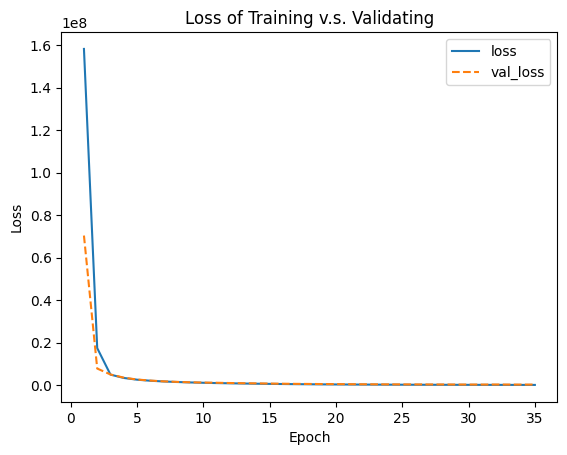

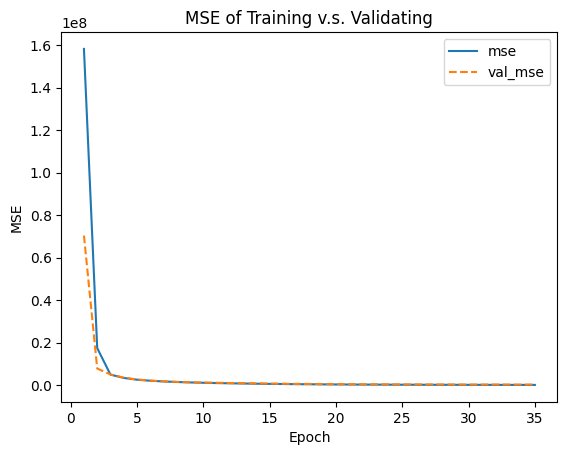

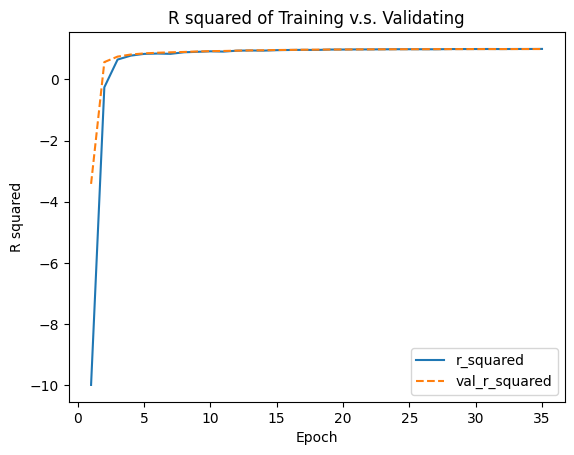

In [137]:
loss = epochs_metrics.history["loss"]
val_loss = epochs_metrics.history["val_loss"]
mse = epochs_metrics.history["mse"]
val_mse = epochs_metrics.history["val_mse"]
met_r_squared = epochs_metrics.history["r_squared"]
val_met_r_squared = epochs_metrics.history["val_r_squared"]
epochs = range(1, len(epochs_metrics.history["loss"])+1)

plt.figure(1)
plt.title("Loss of Training v.s. Validating")
plt.plot(epochs, loss, "-")
plt.plot(epochs, val_loss, "--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["loss", "val_loss"], loc="best")
plt.show()

plt.figure(2)
plt.title("MSE of Training v.s. Validating")
plt.plot(epochs, mse, "-")
plt.plot(epochs, val_mse, "--")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend(["mse", "val_mse"], loc="best")
plt.show()

plt.figure(3)
plt.title("R squared of Training v.s. Validating")
plt.plot(epochs, met_r_squared, "-")
plt.plot(epochs, val_met_r_squared, "--")
plt.xlabel("Epoch")
plt.ylabel("R squared")
plt.legend(["r_squared", "val_r_squared"], loc="best")
plt.show()

## Inference

In [138]:
# predict
y_pred = new_model.predict(x=X_test)

# use reshape(-1) to flatten
# numpy will automatically compute the size of that dimension where -1 be set
inf_df = {
    "y_pred": y_pred.reshape(-1).tolist(),
    "y_true": y_test.tolist()
}

inf_df = pd.DataFrame(inf_df)

# show the predict result
print(inf_df)

43/43 [==============================] - 0s 2ms/step
            y_pred  y_true
0     11221.311523   11295
1     19240.564453   18995
2      9115.010742    8950
3     10011.535156    9995
4     15915.657227   15990
...            ...     ...
1343  13728.815430   13998
1344  10607.237305   10495
1345   9298.735352    9233
1346  22581.488281   22498
1347  12286.078125   12295

[1348 rows x 2 columns]


## Evaluation

In [139]:
# evaluation
test_loss, test_mse, test_r_squared = new_model.evaluate(X_test, y_test)
print("Loss of Testing Set:", test_loss)
print("MSE of Testing Set: ", test_mse)
print("R squared of Testing Set: ", test_r_squared)

43/43 [==============================] - 0s 3ms/step - loss: 104736.5938 - mse: 104736.5938 - r_squared: 0.9970
Loss of Testing Set: 104736.59375
MSE of Testing Set:  104736.59375
R squared of Testing Set:  0.9970223903656006
